**Remember From the Top Menu Click on Runtime -> Change Runtime type -> then Choose GPU to accelerate the learning.**

In [100]:
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding,Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv1D,MaxPooling1D
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from string import punctuation
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from textblob import Word 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
#connecting to google drive to mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
#reading from the csv to create the dataframe
df = pd.read_csv('/content/drive/MyDrive/Data/imdb_master.csv',encoding='latin-1')
#displaying first few rows
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [116]:
#storing review values in sentences
sentences = df['review'].values
#storing label values in y
y = df['label'].values

2. Drop "unsup"

In [117]:
# dropping unsup label from the dataframe
df.drop(df[df['label']=='unsup'].index, inplace = True)

3. Removing punctuation, lower case words, and performing lemmatization.

In [119]:
# performing word tokenization
df['review'] = df['review'].apply(word_tokenize)
# removing lower case
df['review'] = df['review'].apply(lambda words: [x.lower() for x in words])
# removing punctuation
df['review'] = df['review'].apply(lambda words: [x for x in words if not x in punctuation])
# performing lemmatization
df['review'] = df['review'].apply(lambda words: " ".join([Word(x).lemmatize() for x in words]))


In [121]:
# after preprocessing
sentences = df['review'].values
y = df['label'].values

tokenizing data

In [122]:
# tokenizing the text
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
tokenizer.document_count

50000

getting the vocabulary of data


In [123]:
# converting the text to a matrix of 0s and 1s
X = tokenizer.texts_to_matrix(sentences)

In [124]:
print('\nLen() of X:', len(X))
print('\n', X[:2])


Len() of X: 50000

 [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [125]:
#X = pad_sequences(X) # Pads sequences to the same length.
print('X.shape = ', X.shape)

X.shape =  (50000, 2000)


In [126]:
# performing label encoding, converting 0s and 1s to neg and pos
le = preprocessing.LabelEncoder()
# performing fit transform
y = le.fit_transform(y)

In [127]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [128]:
# checking the shapes to create the sequential model accordingly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)


(37500, 2000)
(12500, 2000)
(37500,)
(12500, 2000)


1. Errors found when running the given model: 

    *   Adjusted the input dimension to be similar to the shape of the train and test data.
    *   Changing optimizer to sigmoid since we only need to classify 2 classes.
    *   Using binary_crossentropy since we only have pos and neg reviews to classify.





In [129]:
# creating new model from given model with adjustments to correct errors
model = Sequential()

# modifying input dim to become similar to X_train dimension of 2000
model.add(layers.Dense(300, input_dim=2000, activation='relu'))
# activiation using sigmoid since classification performed between 2 classes
model.add(layers.Dense(1, activation='sigmoid'))
# compiling the model with binary_crossentropy since 2 classes are used for output
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [130]:
# model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 300)               600300    
                                                                 
 dense_12 (Dense)            (None, 1)                 301       
                                                                 
Total params: 600,601
Trainable params: 600,601
Non-trainable params: 0
_________________________________________________________________


In [131]:
# fitting the model
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 2s 8ms/step - loss: 0.3424 - acc: 0.8545 - val_loss: 0.2968 - val_acc: 0.8752
Epoch 2/5
147/147 [==============================] - 1s 5ms/step - loss: 0.2743 - acc: 0.8877 - val_loss: 0.2902 - val_acc: 0.8774
Epoch 3/5
147/147 [==============================] - 1s 5ms/step - loss: 0.2445 - acc: 0.9014 - val_loss: 0.2875 - val_acc: 0.8786
Epoch 4/5
147/147 [==============================] - 1s 5ms/step - loss: 0.2021 - acc: 0.9221 - val_loss: 0.2879 - val_acc: 0.8782
Epoch 5/5
147/147 [==============================] - 1s 5ms/step - loss: 0.1518 - acc: 0.9477 - val_loss: 0.2949 - val_acc: 0.8783


In [132]:
# evaluating the model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

391/391 [==============================] - 1s 2ms/step - loss: 0.2949 - acc: 0.8783
Test loss: 0.29486170411109924
Test accuracy: 0.8783199787139893


Loss: 0.29

Accuracy: 0.87

4. Embedded Layer

In [133]:
#storing review values in sentences
sentences = df['review'].values
#storing label values in y
y = df['label'].values
# tokenizing the text
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)

In [134]:
# storing the longest review
max_review = max([len(s.split()) for s in sentences])
# getting vocab size
vocab_size = len(tokenizer.word_index)+1

In [135]:
print(max_review)
print(vocab_size)

2515
102432


In [137]:
# converting the text to sequence
X = tokenizer.texts_to_sequences(sentences)

In [138]:
X = pad_sequences(X, maxlen=max_review) # Pads sequences to the same length.
print('X.shape = ', X.shape)

X.shape =  (50000, 2515)


In [139]:
# performing label encoding, converting 0s and 1s to neg and pos
le = preprocessing.LabelEncoder()
# performing fit transform
y = le.fit_transform(y)

In [140]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [141]:
# checking the shapes to create the sequential model accordingly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)


(37500, 2515)
(12500, 2515)
(37500,)
(12500, 2515)


In [163]:
# creating new model to add embedding layer
model = Sequential()

# adding embedding layer using vocab size as input dim and 120 as output dim also using the max review as input length
model.add(Embedding(vocab_size, 120, input_length = max_review))
# adding flatten layer
model.add(Flatten())
# output layer using sigmoid
model.add(layers.Dense(1, activation='sigmoid'))
# compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [164]:
# model summary
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 2515, 120)         12291840  
                                                                 
 flatten_9 (Flatten)         (None, 301800)            0         
                                                                 
 dense_19 (Dense)            (None, 1)                 301801    
                                                                 
Total params: 12,593,641
Trainable params: 12,593,641
Non-trainable params: 0
_________________________________________________________________


In [165]:
# fitting the model
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 4s 27ms/step - loss: 0.5983 - acc: 0.7139 - val_loss: 0.3318 - val_acc: 0.8588
Epoch 2/5
147/147 [==============================] - 4s 25ms/step - loss: 0.2744 - acc: 0.8866 - val_loss: 0.2864 - val_acc: 0.8822
Epoch 3/5
147/147 [==============================] - 4s 25ms/step - loss: 0.2240 - acc: 0.9118 - val_loss: 0.2806 - val_acc: 0.8830
Epoch 4/5
147/147 [==============================] - 4s 25ms/step - loss: 0.1829 - acc: 0.9328 - val_loss: 0.2860 - val_acc: 0.8823
Epoch 5/5
147/147 [==============================] - 4s 25ms/step - loss: 0.1385 - acc: 0.9578 - val_loss: 0.2948 - val_acc: 0.8786


In [166]:
# evaluating the model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

391/391 [==============================] - 1s 3ms/step - loss: 0.2948 - acc: 0.8786
Test loss: 0.29475271701812744
Test accuracy: 0.8785600066184998


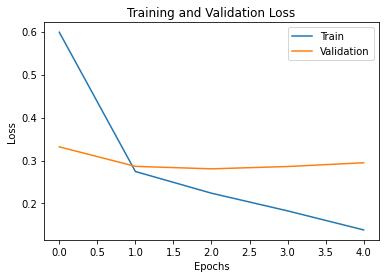

In [167]:
# plotting the loss to check for over or underfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

5. Checking for over or underfitting: The model is underfitting.



In [170]:
# creating new model to solve underfitting issue
modelNew = Sequential()

# adding embedding layer and changing output dim to 20
modelNew.add(Embedding(vocab_size, 20, input_length=max_review))
# adding flatten layer
modelNew.add(Flatten())
# output layer using sigmoid
modelNew.add(layers.Dense(1, activation='sigmoid'))
# compiling the model
modelNew.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [171]:
# model summary
modelNew.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 2515, 20)          2048640   
                                                                 
 flatten_11 (Flatten)        (None, 50300)             0         
                                                                 
 dense_21 (Dense)            (None, 1)                 50301     
                                                                 
Total params: 2,098,941
Trainable params: 2,098,941
Non-trainable params: 0
_________________________________________________________________


In [172]:
# fitting the model
history = modelNew.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 2s 12ms/step - loss: 0.5751 - acc: 0.7001 - val_loss: 0.3793 - val_acc: 0.8502
Epoch 2/5
147/147 [==============================] - 1s 10ms/step - loss: 0.3172 - acc: 0.8721 - val_loss: 0.3020 - val_acc: 0.8772
Epoch 3/5
147/147 [==============================] - 1s 10ms/step - loss: 0.2654 - acc: 0.8924 - val_loss: 0.2842 - val_acc: 0.8832
Epoch 4/5
147/147 [==============================] - 2s 11ms/step - loss: 0.2439 - acc: 0.9011 - val_loss: 0.2825 - val_acc: 0.8832
Epoch 5/5
147/147 [==============================] - 1s 10ms/step - loss: 0.2290 - acc: 0.9083 - val_loss: 0.2844 - val_acc: 0.8838


In [173]:
# evaluating the model
scores = modelNew.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

391/391 [==============================] - 1s 3ms/step - loss: 0.2844 - acc: 0.8838
Test loss: 0.2843641936779022
Test accuracy: 0.8837599754333496


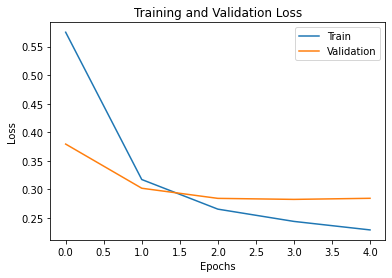

In [174]:
# plotting the loss to check for improved results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

Slightly imporved underfitting from previous model after decreasing embedding output dim

6. 20_news group.

In [175]:
# creating the twenty_train dataset
twenty_train=fetch_20newsgroups(subset='train',shuffle=True)

In [176]:
# tokenizing the text
token=Tokenizer(num_words=2000)
token.fit_on_texts(twenty_train)

In [177]:
# converting the text to sequence
twenty_train=token.texts_to_sequences(twenty_train.data)

In [178]:
# Pads sequences to the same length.
padded = pad_sequences(twenty_train,maxlen=max_review)

In [179]:
predict = modelNew.predict(padded[[0],:])
classes = np.argmax(predict, axis=1)
classes

array([0])

predicted result returned 0 which is neg

BONUS:

In [186]:
# creating model
model = Sequential()
# adding embedding layer
model.add(Embedding(vocab_size, 120, input_length = max_review))
# adding convolution layer 
model.add(Conv1D(64, (3), activation='relu'))
# adding maxpool layer
model.add(MaxPooling1D(2))
# adding flatten layer
model.add(Flatten())
# adding output layer
model.add(Dense(1, activation='sigmoid'))
# compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
# model summary
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 2515, 120)         12291840  
                                                                 
 conv1d_5 (Conv1D)           (None, 2513, 64)          23104     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1256, 64)         0         
 1D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 80384)             0         
                                                                 
 dense_25 (Dense)            (None, 1)                 80385     
                                                                 
Total params: 12,395,329
Trainable params: 12,395,329
Non-trainable params: 0
_________________________________________

In [187]:
# fitting the model
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
147/147 [==============================] - 14s 91ms/step - loss: 0.4917 - acc: 0.7269 - val_loss: 0.3073 - val_acc: 0.8730
Epoch 2/5
147/147 [==============================] - 13s 88ms/step - loss: 0.2694 - acc: 0.8886 - val_loss: 0.2821 - val_acc: 0.8852
Epoch 3/5
147/147 [==============================] - 13s 89ms/step - loss: 0.2419 - acc: 0.9014 - val_loss: 0.2845 - val_acc: 0.8834
Epoch 4/5
147/147 [==============================] - 13s 88ms/step - loss: 0.2226 - acc: 0.9111 - val_loss: 0.2900 - val_acc: 0.8799
Epoch 5/5
147/147 [==============================] - 14s 98ms/step - loss: 0.2054 - acc: 0.9192 - val_loss: 0.2872 - val_acc: 0.8838


In [188]:
# evaluating the model
scores = modelNew.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

391/391 [==============================] - 1s 3ms/step - loss: 0.2844 - acc: 0.8838
Test loss: 0.2843641936779022
Test accuracy: 0.8837599754333496
